**PART 1 : DATA PREPROCESSING**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
air = pd.read_excel("AirQualityUCI.xlsx") #reading excel file

In [3]:
air.head() #first 5 rows

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
air.info() #info of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [5]:
air.isnull().sum() #checking null values

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [6]:
air = air.drop( columns = ["Date", "Time" ]) #removing columns

In [7]:
mis_val_tag = -200
air.replace(-200, np.nan, inplace=True)
air.fillna(air.mean(), inplace = True) #replacing missing values with mean


In [8]:
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [9]:
corr_mat = air.corr()
corr_mat                  #printing correlation matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812392,0.795586,0.762297,-0.613870,0.646528,0.558225,0.759027,0.020260,0.043204,0.043273
PT08.S1(CO),0.773394,1.000000,0.278288,0.883821,0.892972,0.615974,-0.771918,0.562997,0.682874,0.899326,0.048628,0.114607,0.135323
NMHC(GT),0.289975,0.278288,1.000000,0.281923,0.279751,0.098185,-0.261985,0.156549,0.232983,0.240594,0.066809,-0.052794,0.037173
C6H6(GT),0.812392,0.883821,0.281923,1.000000,0.981962,0.616880,-0.735711,0.536178,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.795586,0.892972,0.279751,0.981962,1.000000,0.601812,-0.796687,0.561421,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.762297,0.615974,0.098185,0.616880,0.601812,1.000000,-0.563259,0.763133,0.205526,0.688214,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.613870,-0.771918,-0.261985,-0.735711,-0.796687,-0.563259,1.000000,-0.569535,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.646528,0.562997,0.156549,0.536178,0.561421,0.763133,-0.569535,1.000000,0.140940,0.629564,-0.165317,-0.080645,-0.291200
PT08.S4(NO2),0.558225,0.682874,0.232983,0.765717,0.777235,0.205526,-0.538460,0.140940,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.759027,0.899326,0.240594,0.865727,0.880590,0.688214,-0.796554,0.629564,0.591137,1.000000,-0.027193,0.124952,0.070738


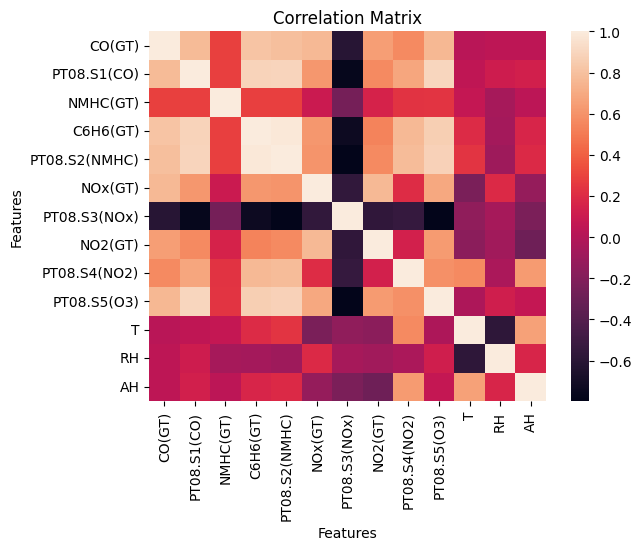

<Figure size 1200x600 with 0 Axes>

In [10]:
sns.heatmap(corr_mat)
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.figure(figsize=(12,6))
 #heatmap
plt.show()

In [11]:
print(corr_mat['PT08.S4(NO2)'].sort_values(ascending = False)[:5]) #4 most correlated features

PT08.S4(NO2)     1.000000
PT08.S2(NMHC)    0.777235
C6H6(GT)         0.765717
PT08.S1(CO)      0.682874
AH               0.629644
Name: PT08.S4(NO2), dtype: float64


In [12]:
final_air = air[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'AH', 'PT08.S4(NO2)']] #creating a dataset

In [13]:
final_air.head()

,PT08.S1(CO),PT08.S2(NMHC),C6H6(GT),AH,PT08.S4(NO2)
0,1360.00,1045.50,11.881723,0.757754,1692.00
1,1292.25,954.75,9.397165,0.725487,1558.75
2,1402.00,939.25,8.997817,0.750239,1554.50
3,1375.50,948.25,9.228796,0.786713,1583.75
4,1272.25,835.50,6.518224,0.788794,1490.00


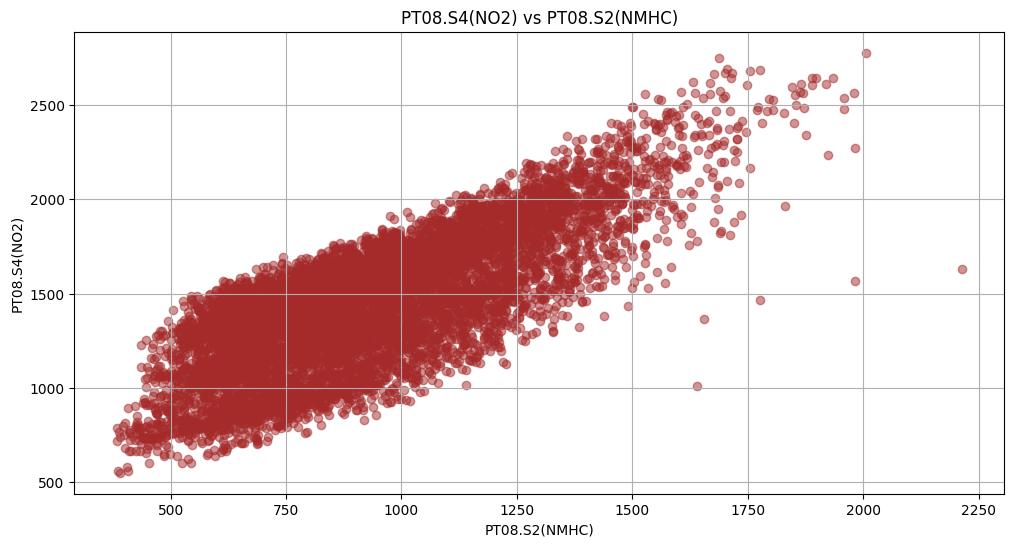

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(final_air['PT08.S2(NMHC)'], final_air['PT08.S4(NO2)'], alpha=0.5, color = 'brown')
plt.title('PT08.S4(NO2) vs PT08.S2(NMHC)')   #scatter plot of target variable with PT08.S2(NMHC)
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('PT08.S4(NO2)')
plt.grid(True) #plotting grid lines for clarity
plt.show()


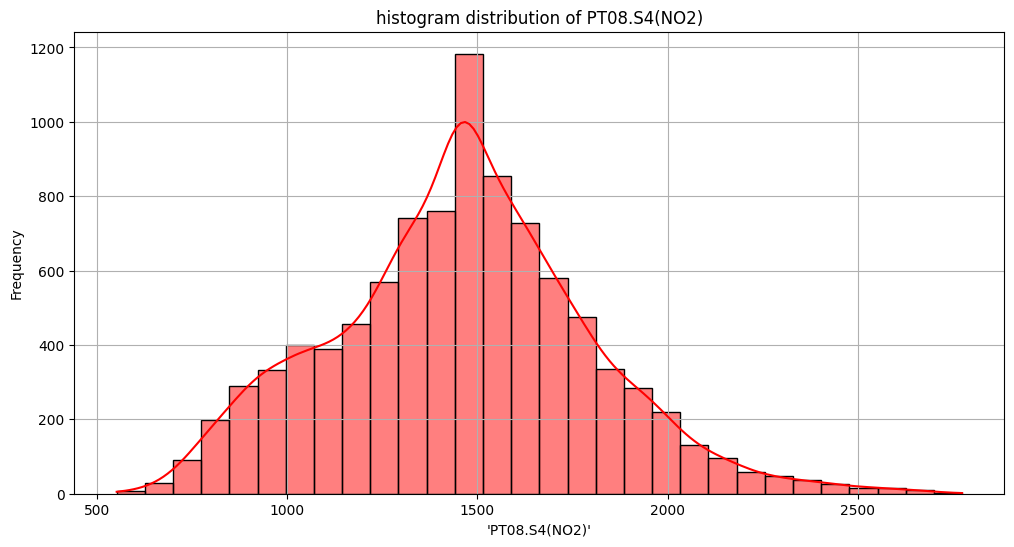

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(final_air['PT08.S4(NO2)'], kde=True, bins=30, color='red')
plt.title(f"histogram distribution of {'PT08.S4(NO2)'}")
plt.xlabel("'PT08.S4(NO2)'")                        #plottting histogram for frequency of target variable
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [16]:
x = final_air[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'AH']]
y = final_air['PT08.S4(NO2)']

scaler_x = MinMaxScaler() #applying min max scalar so that all data will be in a particular range
scaler_y = MinMaxScaler()

x_afterscale = scaler_x.fit_transform(x)
y_afterscale = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [17]:
print(x_afterscale)
print(y_afterscale)

[[0.51184919 0.36173699 0.184498   0.28004639]
 [0.46319569 0.31216714 0.14542796 0.26427867]
 [0.54201077 0.30370067 0.13914816 0.27637413]
 ...
 [0.35529623 0.3710228  0.19224758 0.22282027]
 [0.2551167  0.31530793 0.14778707 0.16086487]
 [0.30412926 0.36269289 0.18528954 0.15545906]]
[[0.51303957]
 [0.453125  ]
 [0.45121403]
 ...
 [0.31013939]
 [0.22032374]
 [0.25966727]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_afterscale, y_afterscale, test_size=0.2, shuffle=False)
#splitting dataset
print("Training Data Shape:", x_train.shape, y_train.shape)
print("Testing Data Shape:", x_test.shape, y_test.shape)


Training Data Shape: (7485, 4) (7485, 1)
Testing Data Shape: (1872, 4) (1872, 1)


In [19]:
def seq_creator(data, seq_len):    #creating function for sequence creation
    sequences = []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len])
    return np.array(sequences)

In [20]:
seq_len = 10

#create sequences for features and target
x_train_seq = seq_creator(x_train, seq_len)
y_train_seq =seq_creator(y_train, seq_len)
x_test_seq = seq_creator(x_test, seq_len)
y_test_seq = seq_creator(y_test, seq_len)


In [21]:
print("x_train_seq shape:", x_train_seq.shape) #showing shapes
print("y_train_seq shape:", y_train_seq.shape)
print("x_test_seq shape:", x_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)


x_train_seq shape: (7475, 10, 4)
y_train_seq shape: (7475, 10, 1)
x_test_seq shape: (1862, 10, 4)
y_test_seq shape: (1862, 10, 1)


**PART 2 : MODELING AND EVALUATION**

In [22]:
#defining rnn model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(20, activation='tanh', input_shape=(10, 4)))
rnn_model.add(Dropout(0.2))  # Adding dropout to prevent overfitting
rnn_model.add(Dense(1))

rnn_model.compile(loss='mean_squared_error', optimizer ='adam')

#training rnn
rnn_log = rnn_model.fit(x_train_seq, y_train_seq[:, -1], epochs=20, batch_size=32, validation_split=0.2)

#saving rnn
rnn_model.save("rnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0574 - val_loss: 0.0141
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0100 - val_loss: 0.0149
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071 - val_loss: 0.0151
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057 - val_loss: 0.0159
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0049 - val_loss: 0.0148
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - val_loss: 0.0158
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0136
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0155
Epoch 9/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - val_loss: 0.0155
Epoch 10/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - val_loss: 0.0125
Epoch 11/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0164
Epoch 12/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [23]:
#defining lstm
lstm_model = Sequential()
lstm_model.add(LSTM(20, activation='tanh', input_shape=(10, 4)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

#compiling lstm
lstm_model.compile(loss='mean_squared_error',optimizer='adam')

#training lstm
lstm_log = lstm_model.fit(x_train_seq, y_train_seq[:, -1], epochs=20, batch_size=32, validation_split=0.2)

#saving lstm
lstm_model.save("lstm_model.h5")


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0474 - val_loss: 0.0116
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0093 - val_loss: 0.0152
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0068 - val_loss: 0.0109
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - val_loss: 0.0157
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - val_loss: 0.0148
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - val_loss: 0.0143
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - val_loss: 0.0180
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - val_loss: 0.0157
Epoch 9/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - val_loss: 0.0164
Epoch 10/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - val_loss: 0.0129
Epoch 11/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0138
Epoch 12/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [24]:
#loading models
loaded_rnn_model = load_model("rnn_model.h5")
loaded_lstm_model = load_model("lstm_model.h5")

#using 30% for test
testing_size = int(0.3 * x_test_seq.shape[0])
x_test_sample = x_test_seq[:testing_size]
y_test_sample = y_test_seq[:testing_size, -1]

#prediction of both
rnn_preds = loaded_rnn_model.predict(x_test_sample)
lstm_preds = loaded_lstm_model.predict(x_test_sample)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


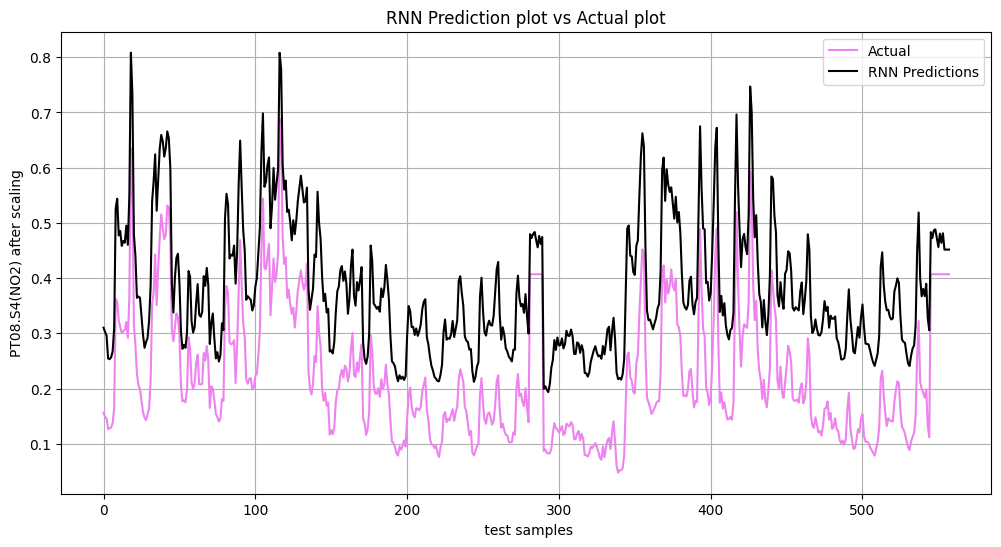

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label="Actual", color="violet")
plt.plot(rnn_preds, label="RNN Predictions", color="black")
plt.title("RNN Prediction plot vs Actual plot")
plt.xlabel(" test samples")                         #rnn prediction comparision
plt.ylabel("PT08.S4(NO2) after scaling")
plt.legend()
plt.grid()
plt.show()

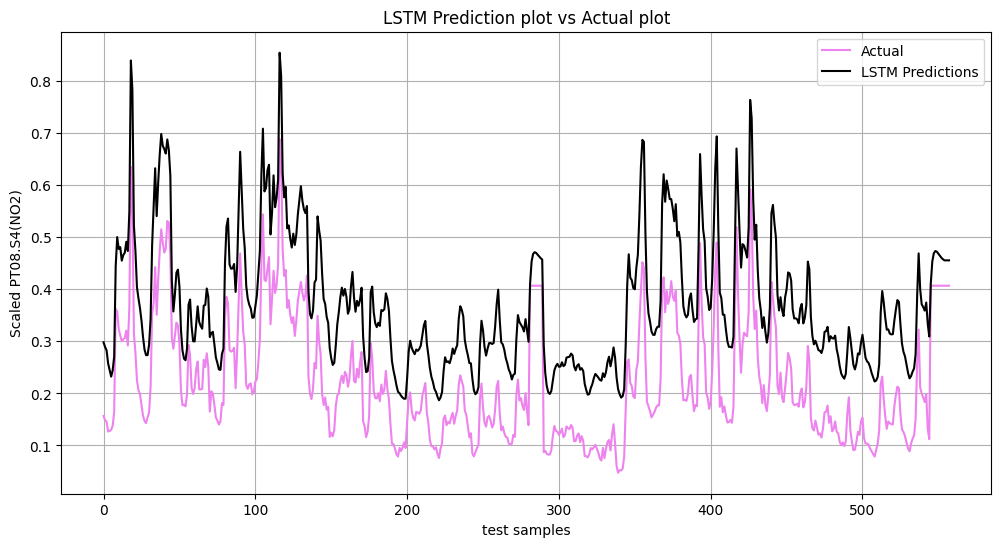

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label="Actual", color="violet")
plt.plot(lstm_preds, label="LSTM Predictions", color="black")
plt.title("LSTM Prediction plot vs Actual plot")
plt.xlabel("test samples")
plt.ylabel("Scaled PT08.S4(NO2)")                 #lstm prediction comparision
plt.legend()
plt.grid()
plt.show()

**PART 3: BIAS AND VARIANCE**

In [27]:
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

#splitting iris data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_iris, y_iris, test_size=0.3, random_state=0, shuffle=True)

In [28]:
np.random.seed(36)
subset_list = []
subset_size = len(x_train1) // 10  #creating subsets

for i in range(10):
    if subset_size > len(x_train1):
        raise ValueError("subset size is more than training examples")

    indices = np.random.choice(len(x_train1), subset_size, replace=False)
    subset_list.append((x_train1[indices], y_train1[indices]))


In [29]:
train_error_list = []
test_error_list = []

#training decision tree
for i, (x_sub, y_sub) in enumerate(subset_list):
    model = DecisionTreeClassifier(random_state=0)
    model.fit(x_sub, y_sub)

    train_preds = model.predict(x_sub)
    train_error = 1 - accuracy_score(y_sub, train_preds)
    train_error_list.append(train_error)

    test_preds = model.predict(x_test1)
    test_error = 1 - accuracy_score(y_test1, test_preds)
    test_error_list.append(test_error)


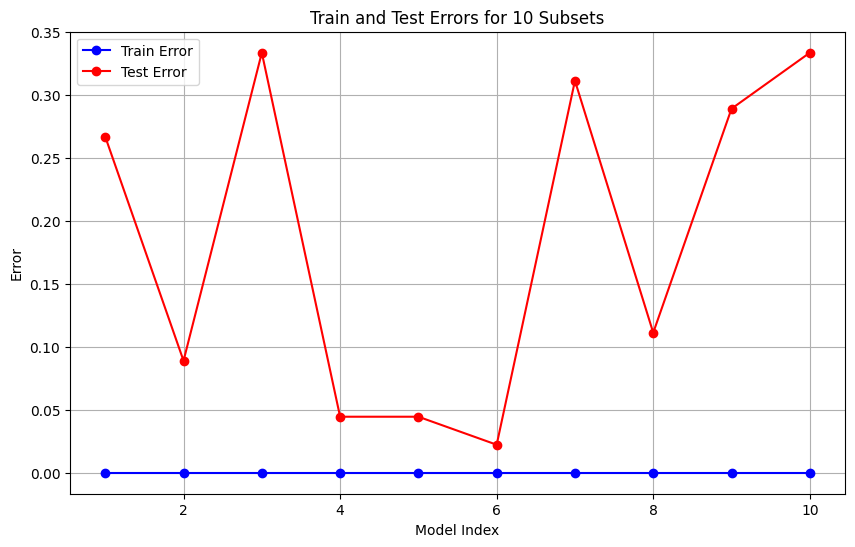

In [30]:
#train error vs test error plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_error_list, marker='o', label="Train Error", color='blue')
plt.plot(range(1, 11), test_error_list, marker='o', label="Test Error", color='red')
plt.title("Train and Test Errors for 10 Subsets")
plt.xlabel("Model Index")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()
